In [2]:
# importing necessary modules

import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
# loading data
df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

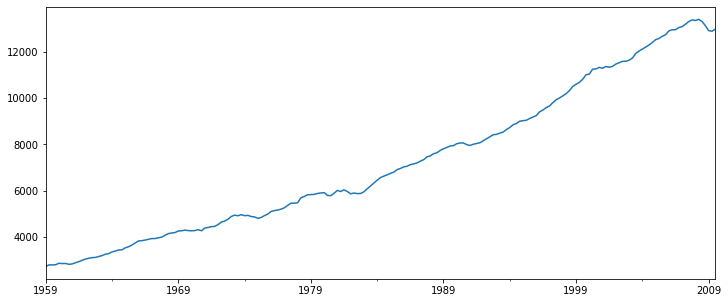

In [5]:
df['realgdp'].plot(figsize=(12,5))

In [6]:
# importing the Hodrick–Prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600) # keeping lambda at 1600 since it's quartely data
# returns the cyclic and trend components of the gdp data

In [8]:
type(gdp_trend)

pandas.core.series.Series

In [9]:
df['trend'] = gdp_trend

<AxesSubplot:>

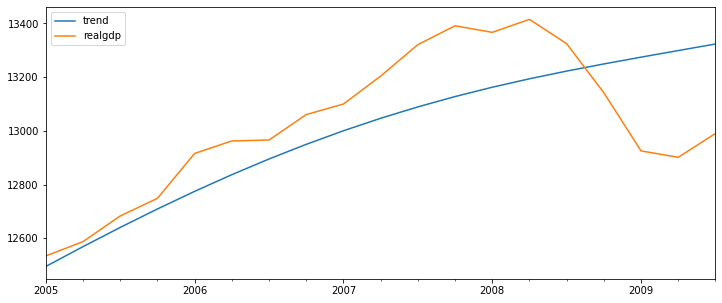

In [10]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

<AxesSubplot:>

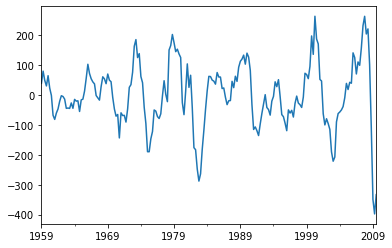

In [11]:
gdp_cycle.plot()

## ETS Decomposition

### ETS: Error, Trend, Seasonality

In [12]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [13]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
#dropping missing values
airline = airline.dropna()

<AxesSubplot:xlabel='Month'>

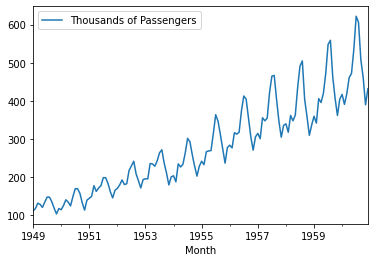

In [15]:
airline.plot()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

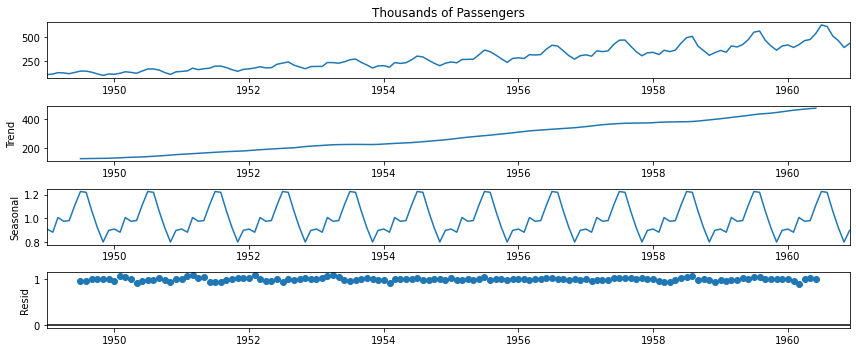

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

## EWMA (Exponentially Weighted Moving Average)

Simple Moving averages gives us some idea about the trend and seasonality but it has it's own drawbacks (lags, noisy behaviour, not reaching the full peak etc.). EWMA allows us to put more weight on the more recent values

using the same airline data

parsing the dates in the index

In [18]:
airline.index = pd.to_datetime(airline.index)

In [19]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [20]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
airline['6-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

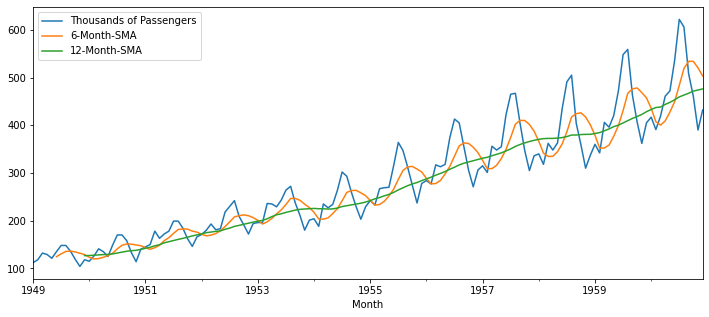

In [22]:
airline.plot(figsize=(12,5))

In [23]:
# using EWMA
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

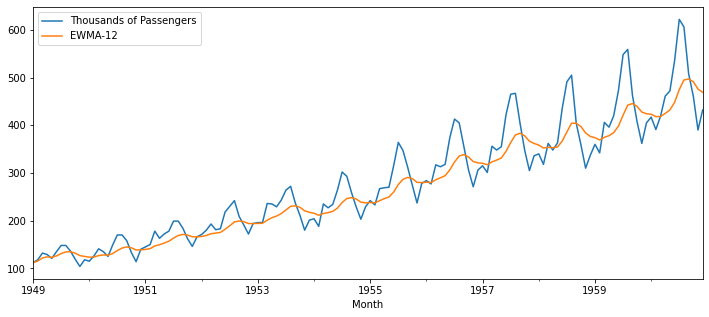

In [24]:
airline[['Thousands of Passengers','EWMA-12']].plot()

## Holt-winters method for fitting time series

Holt: Doble expoential fit for level and trend components\
Holt-Winters: Triple exponential fit for level, trend and seasonal components

working again with the airline data

In [25]:
df = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df = df.dropna()
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [27]:
df.index.freq='MS'  # setting the datetime index frequency to Month

In [28]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

let's first see the simple exponential smoothing

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [30]:
span = 12
alpha = 2/(span+1)

In [31]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [32]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


doing the same using statsmodels

In [33]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [34]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [35]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [36]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [37]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


So, simple Exponential Smoothing gives the same results as EWMA

### using the double and triple exponential models

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='Month'>

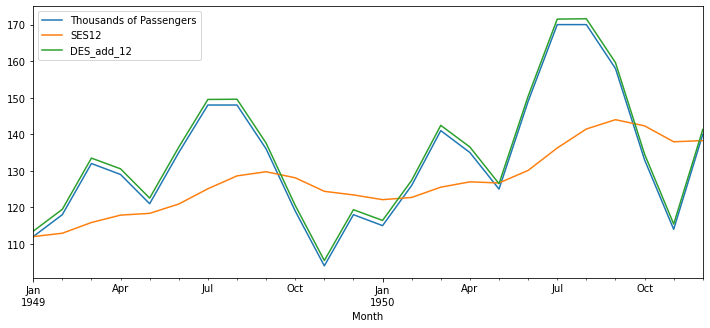

In [40]:
df[['Thousands of Passengers','SES12','DES_add_12']].iloc[:24].plot(figsize=(12,5))

In [41]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='Month'>

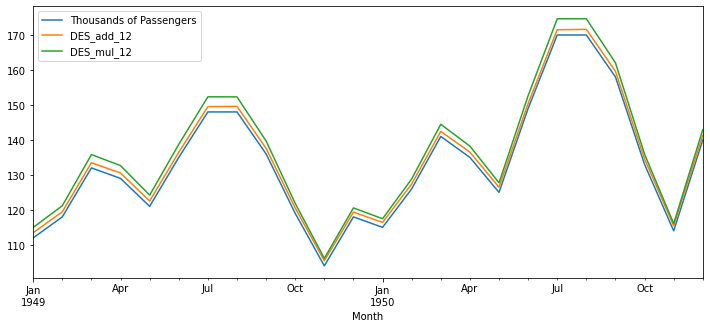

In [42]:
df[['Thousands of Passengers','DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [43]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
# note that we don;t have to shift the fittedvalues for the triple exponential smoothing model results

/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

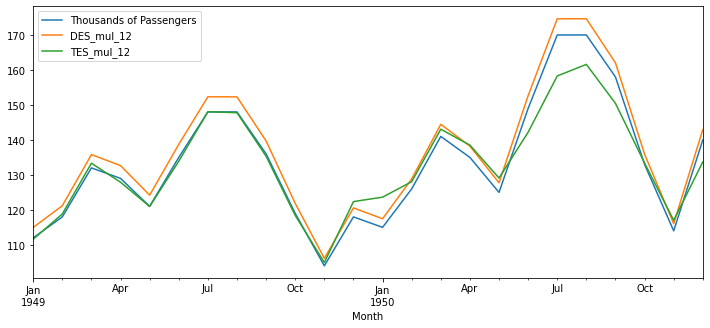

In [44]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[:24].plot(figsize=(12,5))

Although the simpler DES multiplicative model may seem to perform better, the more complicated TES model will be better for forecasting.